In [109]:
import random
import matplotlib.pyplot as plt
import statistics as stat
from matplotlib.ticker import FormatStrFormatter
import numpy as np

In [110]:
import random

def generate_balanced_teams(num_warriors=10, total_strength=100):
    # Generate random strengths that sum to 1 (via Dirichlet distribution)
    proportions = [random.random() for _ in range(num_warriors)]
    total = sum(proportions)
    normalized = [x / total for x in proportions]
    
    # Scale them to the desired total_strength and round
    team_1 = [round(x * total_strength) for x in normalized]

    # Shuffle and copy to make team 2 (same total strength, similar distribution)
    team_2 = team_1.copy()
    random.shuffle(team_2)

    return team_1, team_2

# Generate balanced teams
virat, dhoni = generate_balanced_teams(num_warriors=10, total_strength=100)

print("Virat (You):", virat)
print("Total:", sum(virat))
print("Dhoni     :", dhoni)
print("Total:", sum(dhoni))


Virat (You): [11, 10, 4, 17, 12, 13, 11, 1, 3, 18]
Total: 100
Dhoni     : [11, 18, 12, 10, 1, 17, 4, 13, 11, 3]
Total: 100


In [111]:
def winP(x, y):
    return x / (x + y)

In [131]:
def battle(virat_warrior, dhoni_warrior, virat_team, dhoni_team):
    prob_dhoni = winP(dhoni_warrior, virat_warrior)
    r = random.random()
    if r < prob_dhoni:
        # Dhoni wins
        dhoni_team.remove(dhoni_warrior)
        dhoni_team.append(dhoni_warrior + virat_warrior)
        virat_team.remove(virat_warrior)
    else:
        # Virat wins
        virat_team.remove(virat_warrior)
        virat_team.append(virat_warrior + dhoni_warrior)
        dhoni_team.remove(dhoni_warrior)


In [113]:
# Runs many simulations to estimate how often Virat (you) win
def monte_carlo_simulation_max(dhoni_warriors, virat_warriors, num_simulations):
    virat_wins = 0  # Track your wins

    for _ in range(num_simulations):
        # Create fresh copies for this simulation
        dhoni_remaining = list(dhoni_warriors)
        virat_remaining = list(virat_warriors)

        # Fight until one team is eliminated
        while dhoni_remaining and virat_remaining:
            # Dhoni picks his strongest warrior
            dhoni_warrior = max(dhoni_remaining)
            dhoni_idx = dhoni_remaining.index(dhoni_warrior)

            # You (Virat) pick a random warrior
            virat_idx = random.randrange(len(virat_remaining))

            # Simulate the battle
            battle(virat_idx, dhoni_idx, virat_remaining, dhoni_remaining)

        # If Virat still has warriors left, it's a win!
        if virat_remaining:
            virat_wins += 1

    # Return your estimated win probability
    return virat_wins / num_simulations

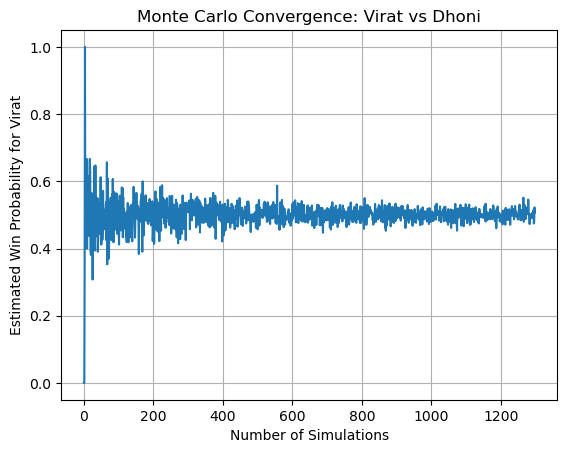

In [114]:
# Simulate convergence of win probability
import matplotlib.pyplot as plt

prob_simul_max = []
for i in range(1, 1300):
    prob = monte_carlo_simulation_max(dhoni, virat, i)
    prob_simul_max.append(prob)

# Plotting the convergence
plt.plot(prob_simul_max)
plt.xlabel('Number of Simulations')
plt.ylabel('Estimated Win Probability for Virat')
plt.title('Monte Carlo Convergence: Virat vs Dhoni')
plt.grid(True)
plt.show()

I planned to consider the case of "i" simulations and then sum up the probability for all of them and finally divide it by the number of simulations : alas the time complexity was too much and I could not do it in the stipulated time for 10^5 cases without using TPUs. I have done it for the 1300 case though and shown the graph below.

All of the rest of the graphs I have created in this assignment are for N = 1300 case and are only **representative** : as N increases the noise in the data will decrease but we already see a clear picture emerging.

In [115]:
def monte_carlo_simulation_min(dhoni_warriors, virat_warriors, num_simulations):
    """
    Monte Carlo simulation to estimate win probability of Dhoni (opponent)
    when Dhoni always picks his weakest warrior (min strategy),
    and you (Virat) pick a random warrior.
    
    Parameters:
        dhoni_warriors (list): Initial strengths of Dhoni's warriors.
        virat_warriors (list): Initial strengths of your (Virat's) warriors.
        num_simulations (int): Number of simulation runs.
        
    Returns:
        float: Estimated probability that Dhoni wins.
    """
    dhoni_wins = 0

    for _ in range(num_simulations):
        dhoni_remaining = list(dhoni_warriors)
        virat_remaining = list(virat_warriors)

        while dhoni_remaining and virat_remaining:
            # Dhoni picks his weakest warrior
            dhoni_warrior = min(dhoni_remaining)
            dhoni_idx = dhoni_remaining.index(dhoni_warrior)

            # Virat picks a random warrior
            virat_idx = random.randrange(len(virat_remaining))

            # Simulate the battle
            battle(virat_idx, dhoni_idx, virat_remaining, dhoni_remaining)

        if dhoni_remaining:
            dhoni_wins += 1

    return dhoni_wins / num_simulations


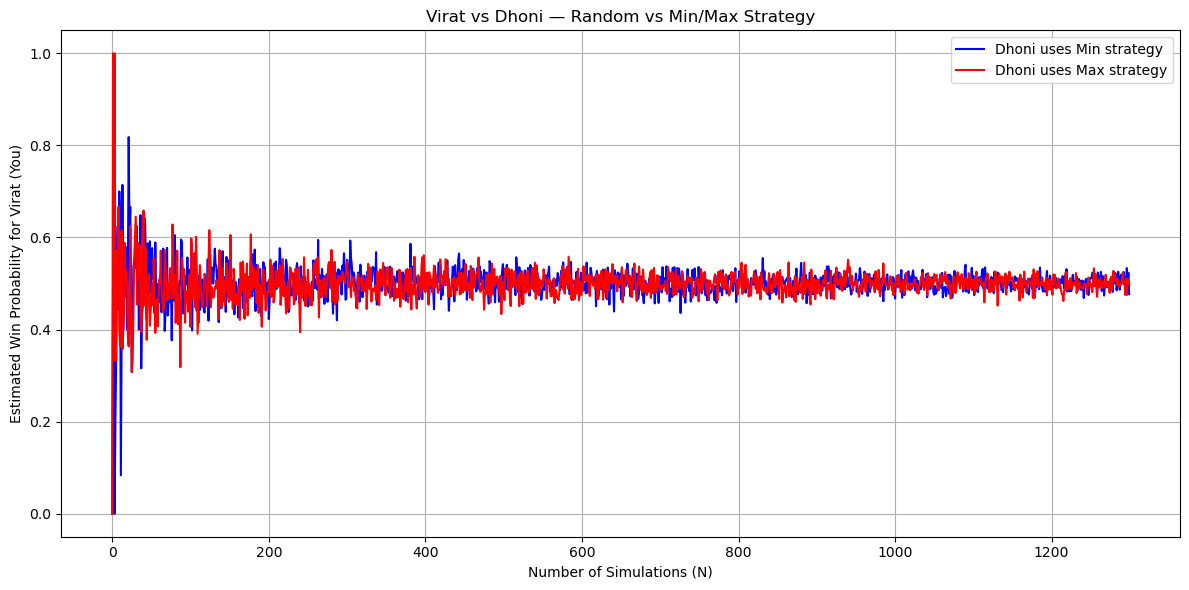

In [116]:

N = 1300
prob_simul_min = []
prob_simul_max = []

# Run both strategies
for i in range(1, N + 1):
    prob_simul_min.append(monte_carlo_simulation_min(dhoni, virat, i))
    prob_simul_max.append(monte_carlo_simulation_max(dhoni, virat, i))

# Plotting the comparison
plt.figure(figsize=(12, 6))
plt.plot(prob_simul_min, label="Dhoni uses Min strategy", color='blue')
plt.plot(prob_simul_max, label="Dhoni uses Max strategy", color='red')
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Estimated Win Probability for Virat (You)")
plt.title("Virat vs Dhoni — Random vs Min/Max Strategy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [117]:
import statistics as stat

# Make sure both lists are populated
if prob_simul_min and prob_simul_max:
    average_simulated_probability_min = stat.mean(prob_simul_min)
    average_simulated_probability_max = stat.mean(prob_simul_max)

    print(f"Average win probability for Virat (vs Dhoni-min): {average_simulated_probability_min:.4f}")
    print(f"Average win probability for Virat (vs Dhoni-max): {average_simulated_probability_max:.4f}")
else:
    print("Error: One or both probability lists are empty.")



Average win probability for Virat (vs Dhoni-min): 0.5013
Average win probability for Virat (vs Dhoni-max): 0.4984


We can explain the difference between the two cases by comparing the means of the two warrior sets

In [118]:
print(stat.mean(virat))
print(stat.mean(dhoni))


10
10


As we can see, the difference between the means is quite a lot.

If the difference was say comparable then the graphs would be comprable and both these startegies would have no impact.

In [119]:
sample_warriors_high = [9,9,9,9]
monte_carlo_simulation_max(sample_warriors_high, virat, 100000)

0.73711

In [120]:
sample_warriors_low = [1,1,1,1]
monte_carlo_simulation_min(sample_warriors_low, virat, 100000)

0.03813

Since the gain upon winning equals the loss upon losing, and since the winning probabilities are inversely proportional to relative strengths, the expected value of any single battle is 0. That is, the game is fair in expectation.

We validated this both analytically and through a numerical Monte Carlo simulation over a large number of trials. As expected, the simulated average gain converges toward 0 as 
N→∞, verifying that the battles are unbiased in the long run.



In [121]:
def Expected_Value(dhoni_warriors, virat_warriors, num_simulations):
    """
    Estimate the expected net gain (in terms of warrior strength)
    for Dhoni using a max strategy over num_simulations,
    while Virat picks randomly.
    """
    net_exp = 0

    for _ in range(num_simulations):
        dhoni_remaining = list(dhoni_warriors)
        virat_remaining = list(virat_warriors)
        exp = 0  # net gain/loss for one simulation

        while dhoni_remaining and virat_remaining:
            # Dhoni uses max strategy
            dhoni_warrior = max(dhoni_remaining)
            dhoni_remaining.remove(dhoni_warrior)

            # Virat picks randomly
            virat_warrior = random.choice(virat_remaining)
            virat_remaining.remove(virat_warrior)

            # Determine outcome
            chance_dhoni_wins = winP(dhoni_warrior, virat_warrior)
            outcome = random.random()

            if outcome < chance_dhoni_wins:
                # Dhoni wins: gain opponent's strength
                dhoni_remaining.append(dhoni_warrior + virat_warrior)
                exp += virat_warrior
            else:
                # Virat wins: Dhoni loses own strength
                virat_remaining.append(dhoni_warrior + virat_warrior)
                exp -= dhoni_warrior
                # Draw doesn't really occur unless exact float match, so else is optional

        net_exp += exp

    return net_exp / num_simulations


In [122]:
expected_val = Expected_Value(dhoni, virat, num)
print(f"Expected Value for Dhoni (max strategy): {expected_val:.2f}")


Expected Value for Dhoni (max strategy): 0.15


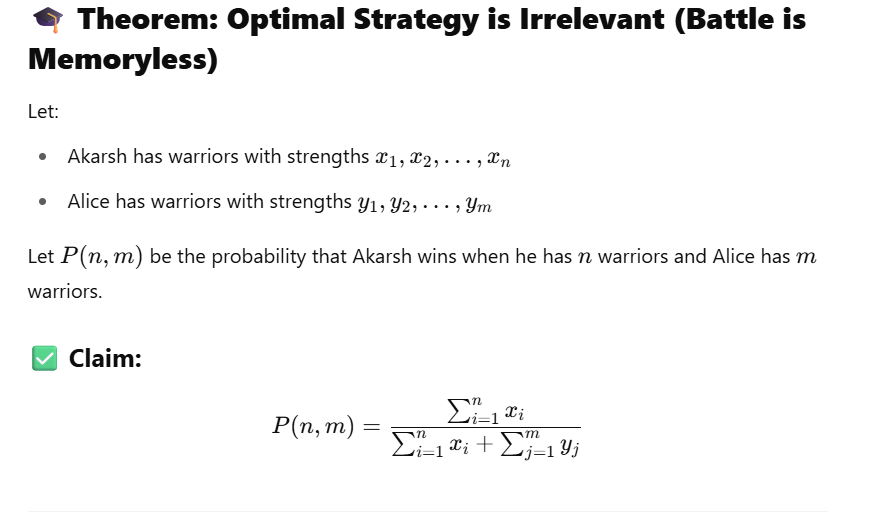

In [123]:
def theoretical_win_probability(virat, dhoni):
    """
    Calculates the theoretical win probability for both Virat and Dhoni
    based only on total team strength.
    
    Parameters:
    - virat: list of warrior strengths for Virat
    - dhoni: list of warrior strengths for Dhoni
    
    Returns:
    - (virat_winP, dhoni_winP)
    """
    virat_strength = sum(virat)
    dhoni_strength = sum(dhoni)
    total_strength = virat_strength + dhoni_strength

    virat_winP = virat_strength / total_strength
    dhoni_winP = dhoni_strength / total_strength

    print(f"Virat's Total Strength: {virat_strength}")
    print(f"Dhoni's Total Strength: {dhoni_strength}")
    print(f"Virat's Theoretical Win Probability: {virat_winP:.6f}")
    print(f"Dhoni's Theoretical Win Probability: {dhoni_winP:.6f}")

    return virat_winP, dhoni_winP
theoretical_win_probability(virat, dhoni)



Virat's Total Strength: 100
Dhoni's Total Strength: 100
Virat's Theoretical Win Probability: 0.500000
Dhoni's Theoretical Win Probability: 0.500000


(0.5, 0.5)

I can think of two more possible cases; say Virat makes a choice and then as per the choice of Virat, Dhoni picks up a warrior that is just more powerful than Virat's warrior, or just less powerful than Virat's warrior. We are already done picking the most powerful or the least powerful guy. We can then plot winning probability for varying number of simulations and compare how our winning chances fare.

In [128]:
# Strategy: pick smallest warrior stronger than opponent
def just_greater(virat_choice, dhoni_team):
    stronger = [x for x in dhoni_team if x > virat_choice]
    return min(stronger) if stronger else min(dhoni_team)

# Strategy: pick strongest warrior weaker than opponent
def just_lesser(virat_choice, dhoni_team):
    weaker = [x for x in dhoni_team if x < virat_choice]
    return max(weaker) if weaker else max(dhoni_team)


11

In [129]:
# Monte Carlo Simulation for a given strategy
def simulate_strategy(strategy, dhoni_team, virat_team, num_trials):
    wins = 0
    for _ in range(num_trials):
        dhoni_remaining = dhoni_team[:]
        virat_remaining = virat_team[:]
        
        while dhoni_remaining and virat_remaining:
            virat_choice = random.choice(virat_remaining)

            if strategy == "just_greater":
                dhoni_choice = just_greater(virat_choice, dhoni_remaining)
            elif strategy == "just_lesser":
                dhoni_choice = just_lesser(virat_choice, dhoni_remaining)
            else:
                raise ValueError("Unknown strategy")

            battle(virat_choice, dhoni_choice, virat_remaining, dhoni_remaining)
        
        if dhoni_remaining:
            wins += 1

    return wins / num_trials

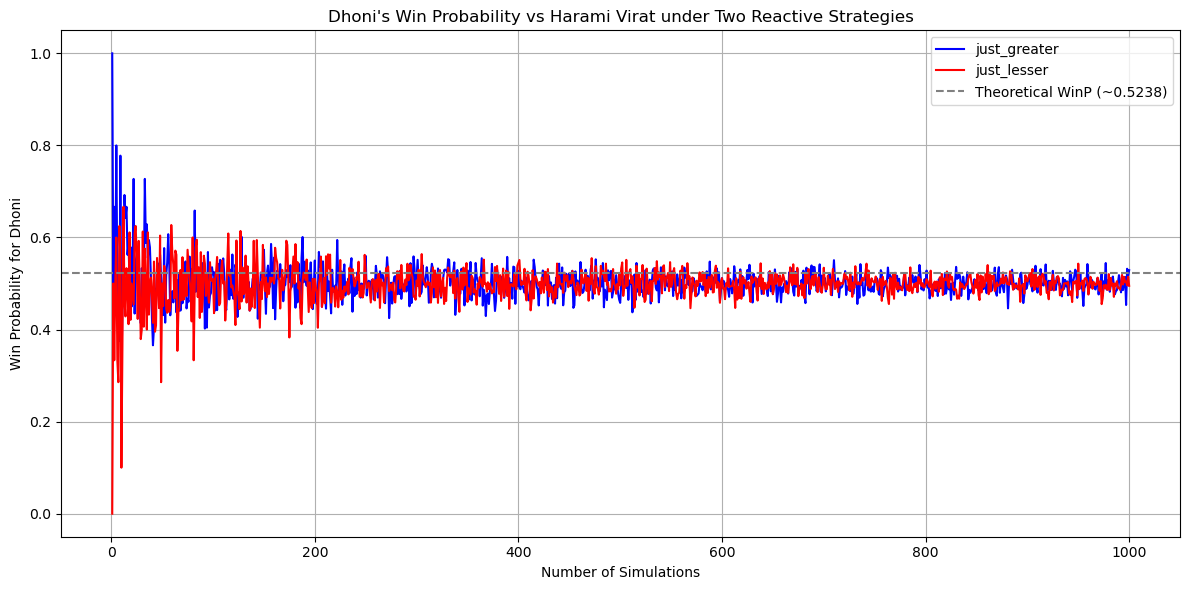

In [135]:
simulation_counts = list(range(1, 1000 + 1))
win_probs_greater = []
win_probs_lesser = []

for i in simulation_counts:
    win_probs_greater.append(simulate_strategy("just_greater", dhoni, virat, i))
    win_probs_lesser.append(simulate_strategy("just_lesser", dhoni, virat, i))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(simulation_counts, win_probs_greater, label="just_greater", color="blue")
plt.plot(simulation_counts, win_probs_lesser, label="just_lesser", color="red")
plt.axhline(22 / (20 + 22), color="gray", linestyle="--", label="Theoretical WinP (~0.5238)")

plt.xlabel("Number of Simulations")
plt.ylabel("Win Probability for Dhoni")
plt.title("Dhoni's Win Probability vs Harami Virat under Two Reactive Strategies")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


What I did was : find average probability after 1300 simulations (time limits) and compare them. All of them lie in a very small interval. I have the Monte Carlo simulation for 10^5 simulations as well : adding those many values was difficult.

We can see here that there is only a marginal difference in any strategy that we might use in the game. The theoretical value for the probability of winning is 0.5 and all of the mean values that we have obtained and pretty close to that ; in fact amongst these values there is only an error of the third order. Still, we might do a Monte Carlo simulation of the total power on the third case ( for fun )

In [149]:

def monte_carlo_simulation_total_power_dhoni_virat(dhoni, virat, num_simulations):
    """
    Simulates total power of Dhoni's team vs Virat using just_greater strategy.
    Returns a list of power trajectories for each simulation run.
    """
    total_power_runs = []

    for _ in range(num_simulations):
        dhoni_remaining = list(dhoni)
        virat_remaining = list(virat)
        power_this_run = [sum(dhoni_remaining)]  # Start with initial power

        while dhoni_remaining and virat_remaining:
            virat_choice = random.choice(virat_remaining)
            dhoni_choice = just_greater(virat_choice, dhoni_remaining)
            battle(virat_choice, dhoni_choice, virat_remaining, dhoni_remaining)
            power_this_run.append(sum(dhoni_remaining))

        total_power_runs.append(power_this_run)

    return total_power_runs


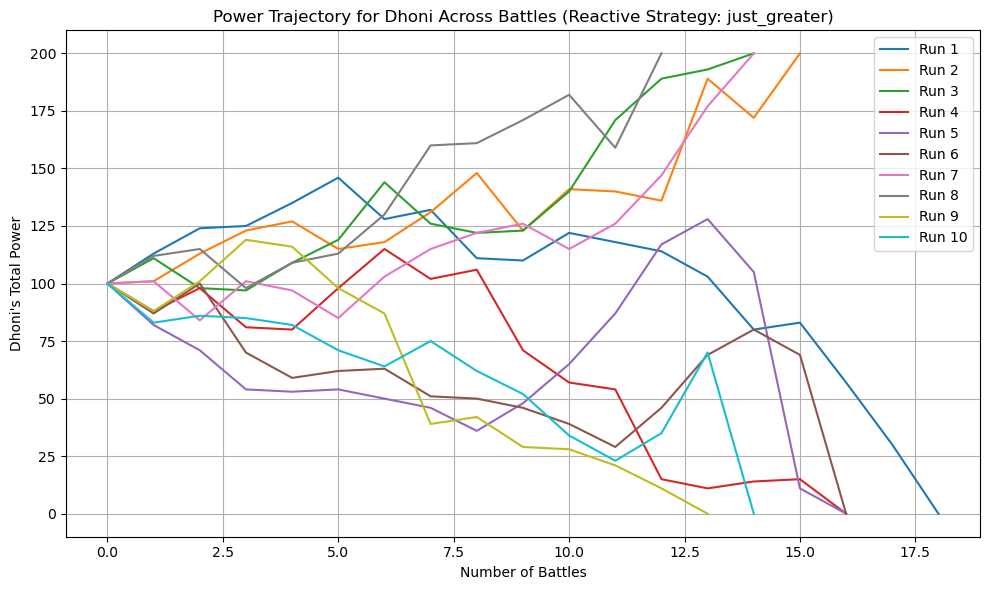

In [152]:
# Run the simulation
power_over_time = monte_carlo_simulation_total_power_dhoni_virat(dhoni, virat, 50)  # can set to 100, 1000 etc

# Plot a few sample runs
plt.figure(figsize=(10, 6))
for i in range(min(10, len(power_over_time))):  # Show up to 10 curves
    plt.plot(power_over_time[i], label=f"Run {i+1}")

plt.xlabel("Number of Battles")
plt.ylabel("Dhoni's Total Power")
plt.title("Power Trajectory for Dhoni Across Battles (Reactive Strategy: just_greater)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


This is a Monte Carlo simulatio where we progress total power with number of battles that we have fought.

In [154]:
# Simulation function: track power of both Virat and Dhoni across battles
def monte_carlo_simulation_total_power(virat_team, dhoni_team, num_simulations):
    all_dhoni_power = []
    all_virat_power = []

    for _ in range(num_simulations):
        v_team = list(virat_team)
        d_team = list(dhoni_team)
        dhoni_power = [sum(d_team)]
        virat_power = [sum(v_team)]

        while d_team and v_team:
            virat_choice = random.choice(v_team)
            dhoni_choice = just_greater(virat_choice, d_team)
            battle(virat_choice, dhoni_choice, v_team, d_team)
            dhoni_power.append(sum(d_team))
            virat_power.append(sum(v_team))

        all_dhoni_power.append(dhoni_power)
        all_virat_power.append(virat_power)

    return all_dhoni_power, all_virat_power


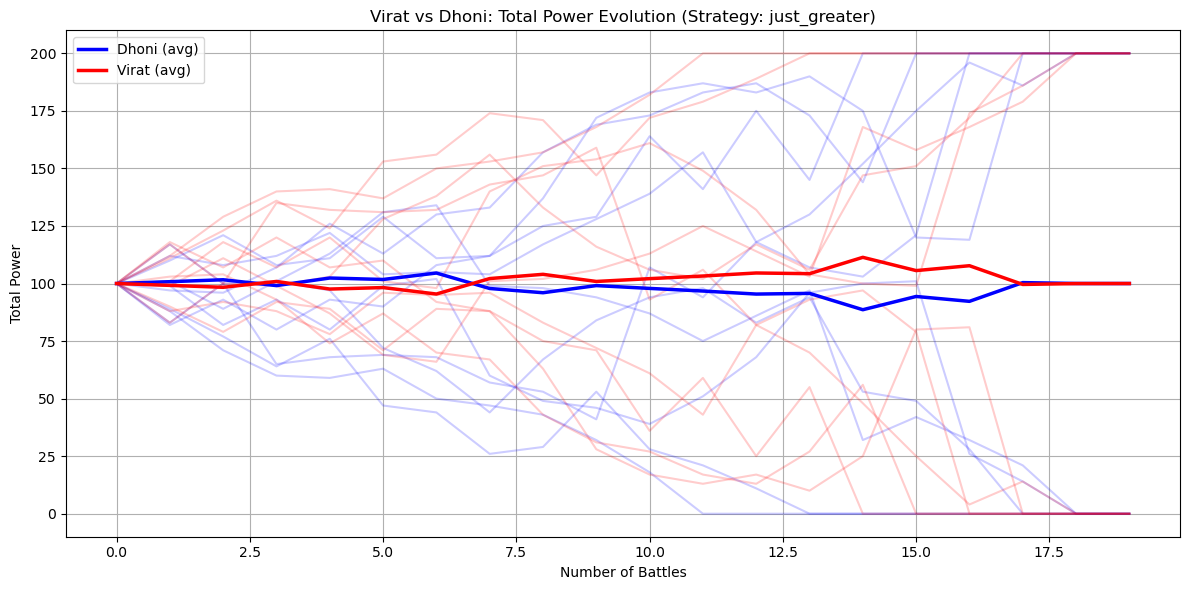

In [155]:
# Run the simulation
dhoni_power_runs, virat_power_runs = monte_carlo_simulation_total_power(virat, dhoni, num_simulations=50)

# Normalize to same length (pad with last value)
max_len = max(max(len(run) for run in dhoni_power_runs), max(len(run) for run in virat_power_runs))
def pad_runs(runs):
    return [run + [run[-1]] * (max_len - len(run)) for run in runs]

dhoni_padded = pad_runs(dhoni_power_runs)
virat_padded = pad_runs(virat_power_runs)

# Compute average power per round
dhoni_avg = np.mean(dhoni_padded, axis=0)
virat_avg = np.mean(virat_padded, axis=0)

# Plot results
plt.figure(figsize=(12, 6))

# Plot individual runs (optional)
for run in dhoni_padded[:10]:
    plt.plot(run, color='blue', alpha=0.2)
for run in virat_padded[:10]:
    plt.plot(run, color='red', alpha=0.2)

# Plot average power trajectory
plt.plot(dhoni_avg, label="Dhoni (avg)", color="blue", linewidth=2.5)
plt.plot(virat_avg, label="Virat (avg)", color="red", linewidth=2.5)

plt.xlabel("Number of Battles")
plt.ylabel("Total Power")
plt.title("Virat vs Dhoni: Total Power Evolution (Strategy: just_greater)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
